<a href="https://colab.research.google.com/github/brasilemnumeros/dados/blob/main/homicidios/Homicidios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analisar dados de Homicídios do Brasil ao longo do tempo.

## Encontrar e carregar os dados

### Subtask:
Procurar uma fonte de dados confiável sobre homicídios no Brasil ao longo do tempo (como dados do IBGE ou de agências internacionais) e carregar esses dados em um DataFrame pandas.


In [13]:
!pip install ipeadatapy

In [14]:
import ipeadatapy as ipea

In [16]:
# Definir o código da série para 'THOMIC'
series_code = 'THOMIC'

# Carregar os dados da série 'THOMIC' usando ipeadatapy
homicidios_df = ipea.timeseries(series_code)

# Exibir as primeiras e últimas linhas do DataFrame carregado
display(homicidios_df.head())
display(homicidios_df.tail())

,CODE,RAW DATE,TERCODIGO,YEAR,NIVNOME,VALUE ((%))
DATE,,,,,,
1980-01-01,THOMIC,1980-01-01T00:00:00-02:00,32,1980,Estados,15.070000
1980-01-01,THOMIC,1980-01-01T00:00:00-02:00,31,1980,Estados,8.700000
1980-01-01,THOMIC,1980-01-01T00:00:00-02:00,15,1980,Estados,8.930000
1980-01-01,THOMIC,1980-01-01T00:00:00-02:00,1200203,1980,Municípios,5.943890
1980-01-01,THOMIC,1980-01-01T00:00:00-02:00,2705705,1980,Municípios,7.182876


,CODE,RAW DATE,TERCODIGO,YEAR,NIVNOME,VALUE ((%))
DATE,,,,,,
2023-01-01,THOMIC,2023-01-01T00:00:00-03:00,35,2023,Estados,6.429734
2023-01-01,THOMIC,2023-01-01T00:00:00-03:00,1,2023,Regiões,31.660881
2023-01-01,THOMIC,2023-01-01T00:00:00-03:00,3,2023,Regiões,12.437214
2023-01-01,THOMIC,2023-01-01T00:00:00-03:00,22,2023,Estados,21.949743
2023-01-01,THOMIC,2023-01-01T00:00:00-03:00,24,2023,Estados,26.439646


In [17]:
print("Unique values in 'NIVNOME':")
display(homicidios_df['NIVNOME'].unique())

print("Unique values in 'TERCODIGO' (first 20):")
display(homicidios_df['TERCODIGO'].unique()[:20])

Unique values in 'NIVNOME':


array(['Estados', 'Municípios', 'Mesorregiões', 'Microrregiões',
       'Área metropolitana', 'AMC 20-00', 'AMC 40-00', 'AMC 60-00',
       'AMC 1872-00', 'AMC 70-00', 'Regiões', 'Brasil', 'AMC 91-00'],
      dtype=object)

Unique values in 'TERCODIGO' (first 20):


array(['32', '31', '15', '1200203', '2705705', '2702603', '2705101',
       '2706901', '1301209', '2926004', '2902609', '2910701', '2923100',
       '2905701', '2910107', '2923407', '2904605', '2917102', '2923902',
       '2915601'], dtype=object)

In [18]:
# Filtrar o DataFrame para incluir apenas os dados do 'Brasil'
homicidios_brasil_df = homicidios_df[homicidios_df['NIVNOME'] == 'Brasil'].copy()

# Filtrar os dados para o período de 1995 a 2025
homicidios_brasil_df = homicidios_brasil_df[(homicidios_brasil_df['YEAR'] >= 1995) & (homicidios_brasil_df['YEAR'] <= 2025)].copy()

# Remover linhas com valores nulos na coluna 'VALUE ((%))' para garantir a integridade da análise
homicidios_brasil_df.dropna(subset=['VALUE ((%))'], inplace=True)

# Exibir as primeiras linhas do DataFrame filtrado e informações para verificar a filtragem
display(homicidios_brasil_df.head())
display(homicidios_brasil_df.info())

,CODE,RAW DATE,TERCODIGO,YEAR,NIVNOME,VALUE ((%))
DATE,,,,,,
1995-01-01,THOMIC,1995-01-01T00:00:00-02:00,0,1995,Brasil,23.84
1996-01-01,THOMIC,1996-01-01T00:00:00-02:00,0,1996,Brasil,24.78
1997-01-01,THOMIC,1997-01-01T00:00:00-02:00,0,1997,Brasil,25.39
1998-01-01,THOMIC,1998-01-01T00:00:00-02:00,0,1998,Brasil,25.94
1999-01-01,THOMIC,1999-01-01T00:00:00-02:00,0,1999,Brasil,26.20


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 1995-01-01 to 2023-01-01
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CODE         29 non-null     object 
 1   RAW DATE     29 non-null     object 
 2   TERCODIGO    29 non-null     object 
 3   YEAR         29 non-null     int32  
 4   NIVNOME      29 non-null     object 
 5   VALUE ((%))  29 non-null     float64
dtypes: float64(1), int32(1), object(4)
memory usage: 1.5+ KB


None

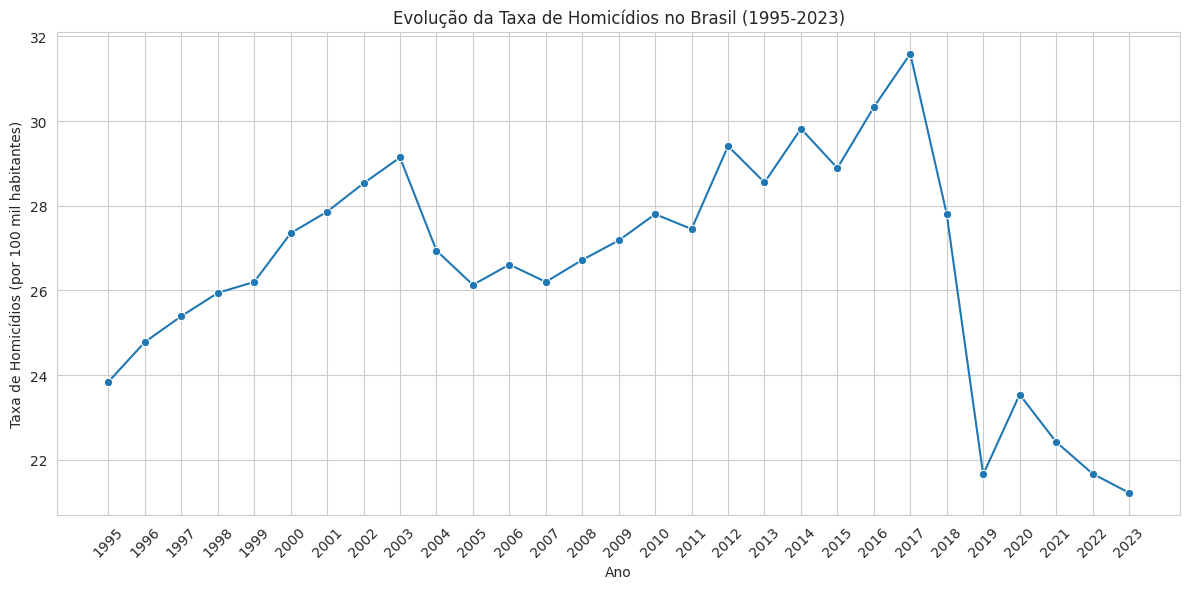

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Renomear a coluna 'VALUE ((%))' para algo mais descritivo
homicidios_brasil_df.rename(columns={'VALUE ((%))': 'Taxa de Homicídios (%)'}, inplace=True)

# Configurar o estilo dos gráficos
sns.set_style('whitegrid')

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=homicidios_brasil_df, x='YEAR', y='Taxa de Homicídios (%)', marker='o')

# Adicionar título e rótulos
plt.title('Evolução da Taxa de Homicídios no Brasil (1995-2023)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Homicídios (por 100 mil habitantes)')
plt.xticks(homicidios_brasil_df['YEAR'].unique(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Obter e carregar dados de homicídios por armas de fogo da API

### Subtask:
Utilizar a biblioteca `requests` para fazer uma requisição GET à URL da API fornecida (`https://www.ipea.gov.br/atlasviolencia/api/v1/valores-series/35/1`). Processar a resposta JSON, transformando-a em um DataFrame pandas. Em seguida, filtrar os dados para o período de 1995 a 2023, garantindo que os dados estejam limpos para análise.


**Reasoning**:
The first step is to import the necessary libraries, define the API URL, make a GET request, and process the JSON response into a pandas DataFrame, then rename columns and filter the data as per the instructions.



## Visualizar a evolução da taxa de homicídios por armas de fogo

### Subtask:
Criar um gráfico de linha usando `matplotlib` e `seaborn` para exibir a evolução da taxa de homicídios por armas de fogo no Brasil entre 1995 e 2023. O gráfico terá um estilo semelhante ao anterior para facilitar a comparação com a taxa de homicídios geral.


In [20]:
import requests
import pandas as pd

# 2. Definir a URL da API para os dados de homicídios por armas de fogo
api_url = 'https://www.ipea.gov.br/atlasviolencia/api/v1/valores-series/35/1'

# 3. Fazer uma requisição GET para a URL da API
response = requests.get(api_url)

# 4. Converter a resposta JSON da requisição em um dicionário Python
data = response.json()

# 5. Acessar a lista de dados dentro do dicionário JSON
# A estrutura da API do Ipea geralmente retorna os dados diretamente ou sob uma chave 'results'
# Vamos inspecionar a chave para ter certeza

if 'results' in data and isinstance(data['results'], list):
    homicidios_armas_data = data['results']
elif isinstance(data, list):
    homicidios_armas_data = data
else:
    print("Could not find data in the expected format.")
    homicidios_armas_data = []

# 6. Criar um DataFrame pandas a partir dessa lista de dados
homicidios_armas_df = pd.DataFrame(homicidios_armas_data)

# Verificar se o DataFrame não está vazio antes de continuar
if not homicidios_armas_df.empty:
    # Primeiramente, padronizar nomes de colunas para minúsculas para facilitar a manipulação
    homicidios_armas_df.columns = homicidios_armas_df.columns.str.lower()

    # Extrair o ano da coluna 'periodo' e criar a coluna 'Ano'
    homicidios_armas_df['Ano'] = pd.to_datetime(homicidios_armas_df['periodo']).dt.year

    # Converter a coluna 'valor' para numérico antes de renomear
    homicidios_armas_df['valor'] = pd.to_numeric(homicidios_armas_df['valor'], errors='coerce')

    # 7. Renomear as colunas do DataFrame para nomes mais descritivos
    column_mapping = {
        'valor': 'Taxa de Homicídios por Armas de Fogo'
    }
    homicidios_armas_df.rename(columns=column_mapping, inplace=True)

    # 8. A coluna 'Ano' já foi criada como numérico, então não é necessário o passo de conversão novamente aqui.

    # 9. Filtrar o DataFrame para incluir apenas os anos entre 1995 e 2023 (inclusive)
    homicidios_armas_df_filtered = homicidios_armas_df[
        (homicidios_armas_df['Ano'] >= 1995) & (homicidios_armas_df['Ano'] <= 2023)
    ].copy()

    # 10. Remover quaisquer linhas que contenham valores nulos na coluna 'Taxa de Homicídios por Armas de Fogo'
    homicidios_armas_df_filtered.dropna(subset=['Taxa de Homicídios por Armas de Fogo'], inplace=True)

    # 11. Exibir as primeiras linhas do DataFrame resultante e suas informações
    print("Primeiras linhas do DataFrame de homicídios por armas de fogo (filtrado):")
    display(homicidios_armas_df_filtered.head())
    print("Informações do DataFrame de homicídios por armas de fogo (filtrado):")
    display(homicidios_armas_df_filtered.info())
else:
    print("O DataFrame de homicídios por armas de fogo está vazio. Verifique a URL da API ou a estrutura da resposta.")

Primeiras linhas do DataFrame de homicídios por armas de fogo (filtrado):


,cod,sigla,Taxa de Homicídios por Armas de Fogo,periodo,Ano
15,1076,BRA,14.32,1995-01-15,1995
16,1076,BRA,14.63,1996-01-15,1996
17,1076,BRA,15.31,1997-01-15,1997
18,1076,BRA,15.87,1998-01-15,1998
19,1076,BRA,16.41,1999-01-15,1999


Informações do DataFrame de homicídios por armas de fogo (filtrado):
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 15 to 42
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cod                                   28 non-null     object 
 1   sigla                                 28 non-null     object 
 2   Taxa de Homicídios por Armas de Fogo  28 non-null     float64
 3   periodo                               28 non-null     object 
 4   Ano                                   28 non-null     int32  
dtypes: float64(1), int32(1), object(3)
memory usage: 1.2+ KB


None

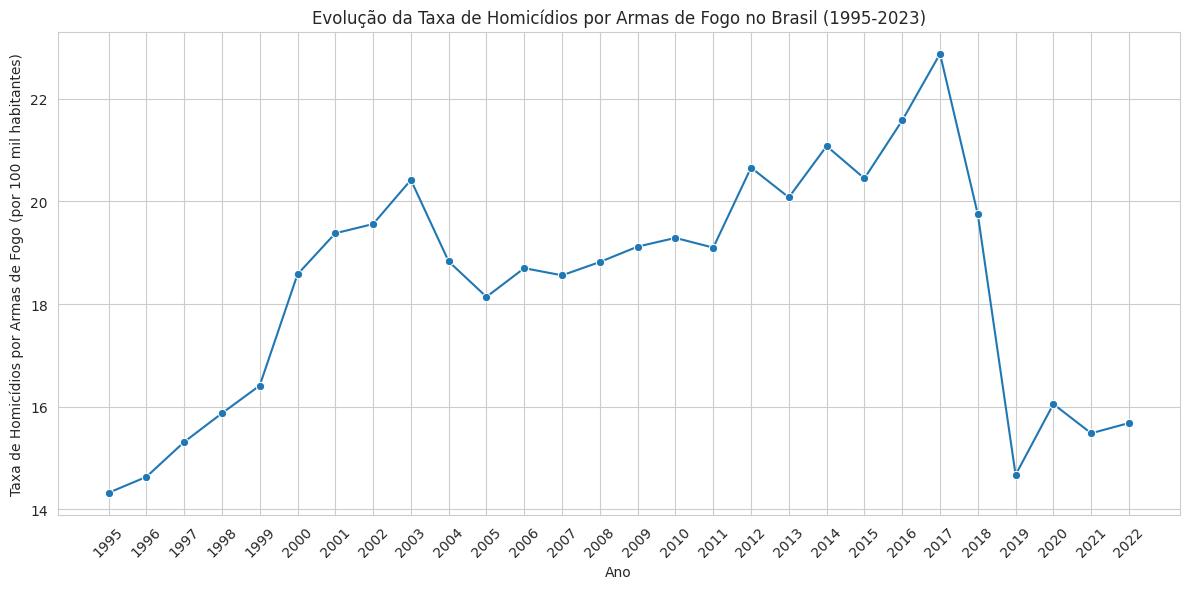

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set_style('whitegrid')

# Criar o gráfico de linha para homicídios por armas de fogo
plt.figure(figsize=(12, 6))
sns.lineplot(data=homicidios_armas_df_filtered, x='Ano', y='Taxa de Homicídios por Armas de Fogo', marker='o')

# Adicionar título e rótulos
plt.title('Evolução da Taxa de Homicídios por Armas de Fogo no Brasil (1995-2023)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Homicídios por Armas de Fogo (por 100 mil habitantes)')
plt.xticks(homicidios_armas_df_filtered['Ano'].unique(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Salvar dados em JSON

In [22]:
import json
import os

# Definir o diretório para salvar os arquivos JSON
output_dir = "/content"
os.makedirs(output_dir, exist_ok=True)

# Função para formatar e salvar dados em JSON
def save_to_json(dataframe, value_column, filename):
    data_list = []
    # Garantir que o DataFrame está ordenado por índice para que as datas estejam em ordem
    dataframe = dataframe.sort_index()

    for index, row in dataframe.iterrows():
        # Formatar a data como YYYY-MM-DD
        # O índice já deve ser um objeto datetime para esta linha funcionar
        date_str = index.strftime('%Y-%m-%d')
        data_list.append({"date": date_str, "value": row[value_column]})

    # Criar a estrutura JSON final
    json_output = {"data": data_list}

    # Definir o caminho completo do arquivo
    filepath = os.path.join(output_dir, filename)

    # Salvar em arquivo JSON
    with open(filepath, 'w', encoding='utf-8') as f:
        json.dump(json_output, f, ensure_ascii=False, indent=4)

    print(f"Dados salvos em: {filepath}")

# --- Salvar homicídios gerais --- #
# 'homicidios_brasil_df' já possui DatetimeIndex e a coluna 'Taxa de Homicídios (%)'
save_to_json(homicidios_brasil_df, 'Taxa de Homicídios (%)', 'homicidios-gerais-brasil.json')

# --- Salvar homicídios por armas de fogo --- #
# Preparar o DataFrame 'homicidios_armas_df_filtered' para ter um DatetimeIndex
homicidios_armas_df_prepared = homicidios_armas_df_filtered.copy()
homicidios_armas_df_prepared['periodo'] = pd.to_datetime(homicidios_armas_df_prepared['periodo'])
homicidios_armas_df_prepared.set_index('periodo', inplace=True)

save_to_json(homicidios_armas_df_prepared, 'Taxa de Homicídios por Armas de Fogo', 'homicidios-armas-fogo-brasil.json')


Dados salvos em: /content/homicidios-gerais-brasil.json
Dados salvos em: /content/homicidios-armas-fogo-brasil.json
